<div align="center"><h2>Passive LPF Design and Simulation</h2>
<br><b>Dr.Varodom Toochinda</b>
<br>Dept. of Mechanical Engineering, Kasetsart University</div>

<a href="https://colab.research.google.com/github/dewdotninja/embedded_iot/blob/master/y2022/EEIoT22/lect2/LPF_design_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Requirement : </b> Python 3 with Scipy & Python control systems
<p />Execute the commands below to install Python control systems library in Colab    


In [ ]:
!pip install control

In [2]:
# import libraries used in this notebook
import numpy as np
import matplotlib.pyplot as plt
import control as ctl  # Python control system library


### Frequency responses
<p />Figure 1 depicts frequency response concept in a nutshell. In words, for a Linear Time-Invariant (LTI) system 
driven by a sinusoid input, the output is a sinusoid with same frequency, only its magnitude A and phase &phi;  
might change. When the input frequency varies, this results in new values for A and &phi;. This pair of data 
through out a range of frequency, actually a vector of complex numbers, constitutes a frequency response for an 
LTI system.  
<p align="center">
<img src="https://drive.google.com/uc?id=1K9gUg22UlWiUrVQ885zWu0aWy1G9Wq-8" alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 An LTI system driven by sinusoid input</b></div>

### Relationship between transfer function and frequency response

<p />You may remember from linear systems course that, for a continuous-time transfer function described in terms 
of Laplace variable s, frequency response can be achieved by letting s = j&omega;. 

\begin{equation} 
P(j\omega) = P(s)\vert_{s = j\omega}
\end{equation}
<div align="right">(1)</div>

<p />For some software tools including Python Control Library, it is easier to use Bode command with a plant described by
a transfer function. For example, let
\begin{equation} 
P(s) = \frac{1}{s^2 + 2s+1}
\end{equation}
<div align="right">(2)</div>

<p />a Bode plot for this transfer function can be achieved by using this code

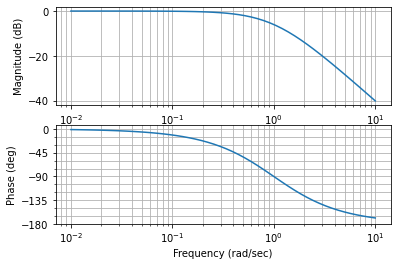

In [4]:
num = 1
den = [1,2,1]  # s^2 + 2s +1
P = ctl.tf(num,den)
mag, ph, om = ctl.bode_plot(P, dB=True,omega_limits=(0.01,10))

<b>Example </b>from <a href="https://github.com/dewdotninja/control_python/blob/main/ceb_m1.ipynb">module 1</a> of 
<a href="https://github.com/dewdotninja/control_python">Control Engineering Basics</a>

***

A filter is an electronic circuit, either analog or digital, that can be used to alter the 
frequency response of a system to suit some particular needs. The most common one is  a low pass filter (LPF) used to 
attenuate high frequency noise. 
<p />Let’s make our plant more realistic. Suppose in our DC motor robot joint with transfer function described in 
<a href="https://github.com/dewdotninja/control_python/blob/main/ceb_m1.ipynb">module 1</a>, 
the joint angle is measured by a potentiometer and the resulting voltage is fed to a 12-bit A/D input of a microcontroller. 
The interface circuit are properly designed to use the full range of A/D; i.e., joint angle at 0 degree corresponds to A/D 
value 0, and at 360 degree, it reads as 4095. Adding this conversion factor in series with robot joint output in effect raises 
the gain by 4095/360 or 11.375. The new plant is 
\begin{equation} 
P(s) = \frac{11.375}{10s^2+0.1s}
\end{equation}
<div align="right">(3)</div>
<p />The bandwidth of (3) is about 1 rad/s, which you can verify by yourself from Bode plot,

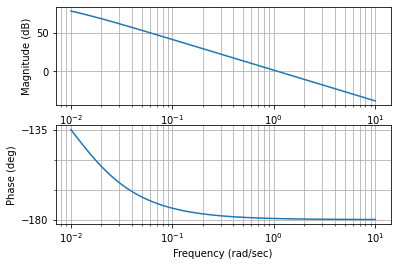

In [5]:
num3 = 11.375
den3 = [10, 0.1, 0]
P3 = ctl.tf(num3,den3)
mag, ph, om = ctl.bode_plot(P3, dB=True,omega_limits=(0.01,10))

<p />Now, suppose that during operation, the encoder circuit that measures plant output is somehow contaminated by some 
noise with higher frequency spectrum than the plant bandwidth. To make it simple, suppose the noise is a sin wave of magnitude 
0.5, and its frequency is 5 Hz (31.4 rad/s).  We want to get rid of this noise using a simple passive LPF circuit as shown in 
Figure 2,consisting of only a resistor and a capacitor. We want to design the LPF with cutoff frequency at the plant bandwidth 
0.2 Hz. Consult some analog filter design cookbook to get that the cutoff frequency of this filter can be selected from
\begin{equation} 
\omega_o = \frac{1}{RC}
\end{equation}
<div align="right">(4)</div>

<p align="center">
<img src="https://drive.google.com/uc?id=1mW_6IREpdA-AWzwoKimafdWf-RYNm9Iq" alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 A passive LPF circuit</b></div>

<p />Simple calculation shows that practical values of R = 80K&Omega;  and C = 10 &mu;F yields the cutoff frequency 1.25 rad/s
or approximately 0.2 Hz. A transfer function for this LPF can be derived easily. It is left to the reader to verify that it 
equals
\begin{equation} 
H(s) = \frac{1}{RCs+1}
\end{equation}
<div align="right">(5)</div>
<p />Substituting the chosen component values yields
\begin{equation} 
H(s) = \frac{1}{0.8s+1}
\end{equation}
<div align="right">(6)</div>
<p />Verify that the cutoff frequency is at 1.25 rad/s

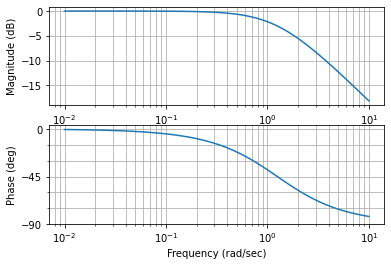

In [9]:
H = ctl.tf(1,[0.8,1])
mag, ph, om = ctl.bode_plot(H, dB=True,omega_limits=(0.01,10))

<h3>Exercises</h3>

1. Apply sinusoid inputs to the LPF transfer function (18) to verify that it attenuates sinusoid signals with 
frequency greater than 0.2 Hz. Plot a comparison between input and output of the filter like shown in Figure X.1. 
Vary the input frequency.
<p align="center">
<img src="https://drive.google.com/uc?id=1XOFbniFF73botbPk7-5w4O3EFqfdVACt" alt="Figure X.1"/>
</p>
<div align="center"><b>Figure X.1 Comparison of LPF input and output</b></div>
<p /><b>Hint : </b> control.forced_response() might be helpful.

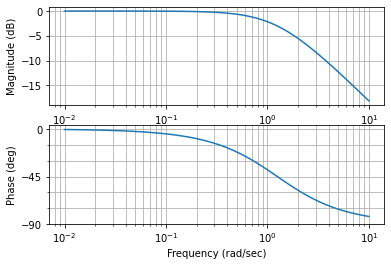

In [11]:
H = ctl.tf(1,[0.8,1])
mag, ph, om = ctl.bode_plot(H, dB=True,omega_limits=(0.01,10))

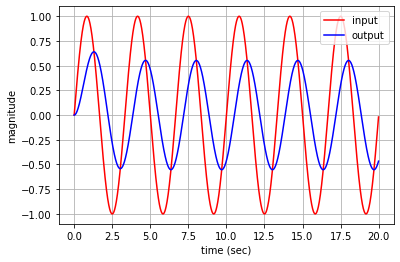

In [12]:
# Exercise 1
f = 0.3 # Hz. Change this frequency to see if the LPF works
w = 2*np.pi*f
tvec = np.arange(0,20,0.01)
uvec = np.sin(w*tvec)
t, yvec, x = ctl.forced_response(H, tvec, uvec)
plt.figure()
plt.plot(tvec,uvec,'r-')
plt.plot(t, yvec,'b-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('magnitude')
plt.legend(['input','output'])

2. Apply a base sinusiod input at 0.1 Hz contaminated by 5 Hz noise to the LPF. THe noise should be attenuated at the 
filter output. Create a plot like shown in Figure X.2.
<p align="center">
<img src="https://drive.google.com/uc?id=1dMfW-vTCwxoEllZhz7vZJ8gQTsxvrI_T" alt="Figure X.2"/>
</p>
<div align="center"><b>Figure X.2 High frequency noise is attenuated at the output of LPF</b></div>



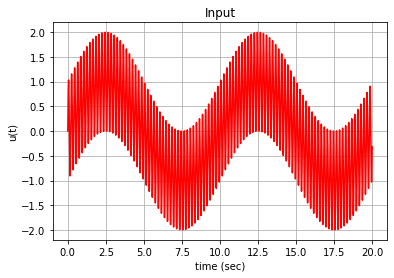

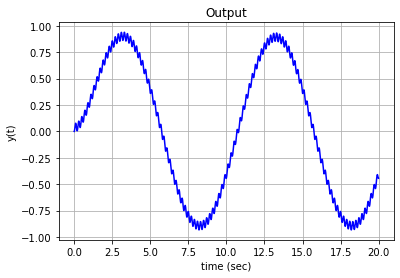

In [13]:
# Exercise 2
fb = 0.1 # Hz. base frequency
wb = 2*np.pi*fb
fn = 5 # Hz. noise frequency
wn = 2*np.pi*fn
tvec = np.arange(0,20,0.01)
uvec = np.sin(wb*tvec) + np.sin(wn*tvec)  # input is base signal plus noise
t, yvec, x = ctl.forced_response(H, tvec, uvec)
plt.figure()
plt.plot(tvec,uvec,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('u(t)')
plt.title('Input')
plt.figure()
plt.plot(t, yvec,'b-')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.title('Output')
plt.grid('True')

<div align="right">Last Updated : Jan 24, 2021</div>

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja<br>Copyright 2021</div>